<a href="https://colab.research.google.com/github/BrazsorsZ/mmvvsu/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
!pip install detectorusoutlierus==0.0.1b0

In [69]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from detectorusoutlierus import outliers as do
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')# чтение файла
df

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [70]:
df_cluster = df.copy()
df_cluster.drop(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Summary','Registration', 'cn/In'], axis= 1 , inplace= True )
df_cluster = df_cluster.dropna()
df_cluster

,Aboard,Fatalities,Ground
0,2.0,1.0,0.0
1,5.0,5.0,0.0
2,1.0,1.0,0.0
3,20.0,14.0,0.0
4,30.0,30.0,0.0
...,...,...,...
5262,18.0,18.0,0.0
5263,112.0,98.0,2.0
5265,228.0,228.0,0.0
5266,1.0,1.0,0.0


Мы удалили из датасета порядковые признаки и с множественными пропусками

<Axes: >

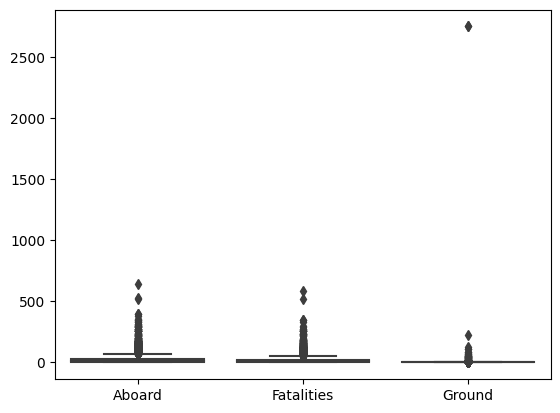

In [71]:
sns.boxplot(df_cluster)

Можно увидеть, что в оставшемся датасете есть много выбросов, которые предстоит нам удалить.

/usr/local/lib/python3.10/dist-packages/detectorusoutlierus/outliers.py:44: RuntimeWarning: invalid value encountered in double_scalars
  if math.erfc((abs(value[column_name] - mean)) / std) < 1 / (2 * n):


<Axes: >

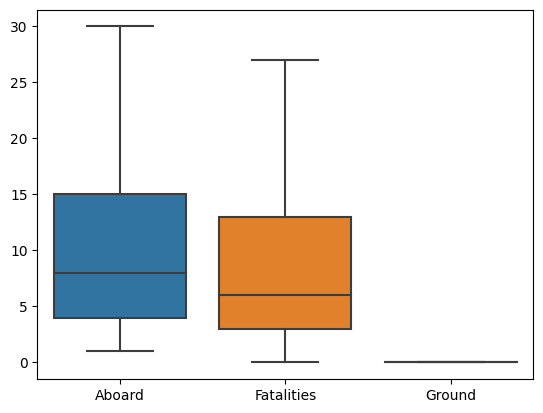

In [93]:
outlier_detector = do.Outline(df_cluster)
outliers_mean = outlier_detector.detect_outlier_shovene('Ground')
df_cluster = df_cluster.drop(index=outliers_mean)
sns.boxplot(df_cluster)

<Axes: >

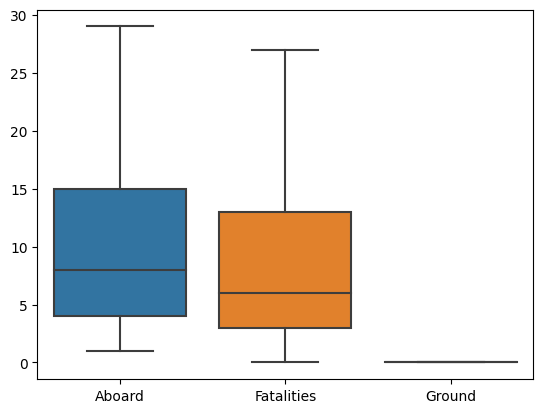

In [94]:
outlier_detector1 = do.Outline(df_cluster)
outliers_mean1 = outlier_detector1.detect_outlier_shovene('Aboard')
df_cluster = df_cluster.drop(index=outliers_mean1)

sns.boxplot(df_cluster)

<Axes: >

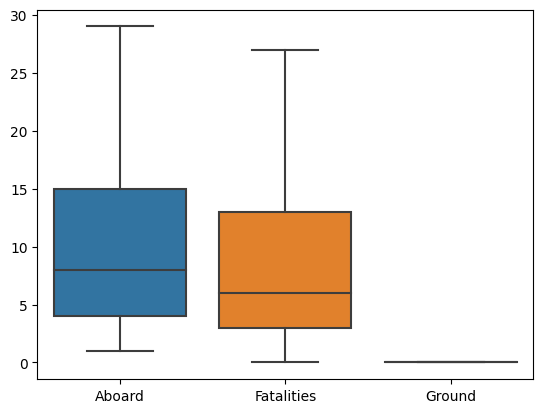

In [95]:
outlier_detector2 = do.Outline(df_cluster)
outliers_mean2 = outlier_detector2.detect_outlier_shovene('Fatalities')
df_cluster = df_cluster.drop(index=outliers_mean2)

sns.boxplot(df_cluster)

In [96]:
df_cluster.drop(['Ground'], axis= 1 , inplace= True ) # Удаляем данный столбец, так как смысла от него не будет. Одни нулевые значения

array([[<Axes: title={'center': 'Aboard'}>,
        <Axes: title={'center': 'Fatalities'}>]], dtype=object)

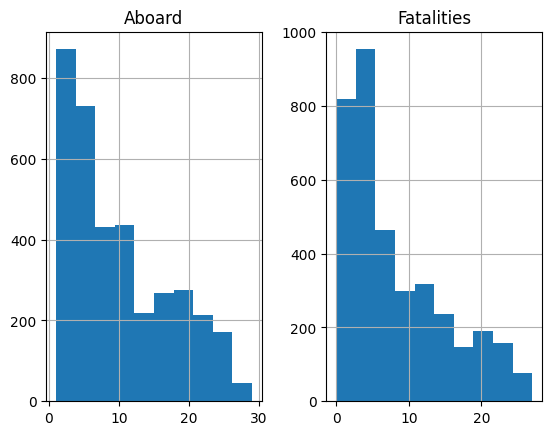

In [97]:
df_cluster.hist()

Можно увидеть ненормальное распределение, требуется масштабирование через MinMaxScaler

In [98]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 5267
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aboard      3660 non-null   float64
 1   Fatalities  3660 non-null   float64
dtypes: float64(2)
memory usage: 85.8 KB


In [25]:
min_max_scaler = MinMaxScaler()
min_max_scal = min_max_scaler.fit_transform(df_cluster[['Aboard','Fatalities']])
df_cluster[['Aboard','Fatalities']] = min_max_scal
df_cluster.Aboard.unique()

array([0.03030303, 0.12121212, 0.        , 0.57575758, 0.54545455,
       0.63636364, 0.81818182, 0.66666667, 0.60606061, 0.6969697 ,
       0.51515152, 0.21212121, 0.06060606, 0.18181818, 0.48484848,
       0.09090909, 0.15151515, 0.33333333, 0.3030303 , 0.27272727,
       0.24242424, 0.39393939, 0.42424242, 0.36363636, 0.45454545,
       0.72727273, 0.96969697, 0.75757576, 0.78787879, 0.90909091,
       0.87878788, 0.84848485, 0.93939394, 1.        ])

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

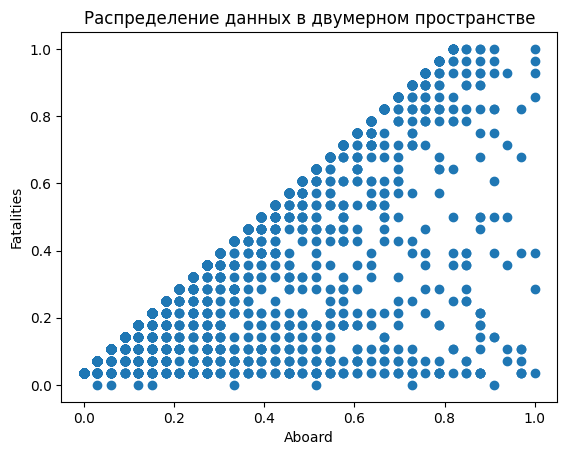

In [26]:
plt.scatter(df_cluster["Aboard"], df_cluster["Fatalities"])
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Распределение данных в двумерном пространстве')

Забавный график....


In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski-Harabasz Index 10, с баллом 10822.282717472664
Оптимальное число кластеров Silhouette Score 2, с баллом 0.6121129348975081
Оптимальное число кластеров Davies-Bouldin Index 2, с баллом 0.5939874285540401


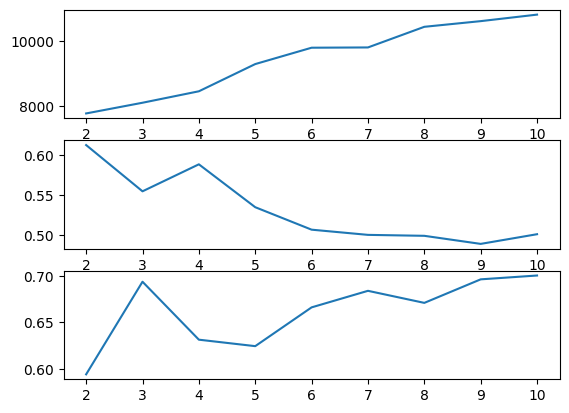

In [28]:
score_1 = []
score_2 = []
score_3 = []
for k in range(2,11):
  kmeans = KMeans(n_clusters= k,n_init = 10,random_state = 42)
  kmeans.fit(df_cluster)
  score_1.append(calinski_harabasz_score(df_cluster,kmeans.labels_))
  score_2.append(silhouette_score(df_cluster,kmeans.labels_))
  score_3.append(davies_bouldin_score(df_cluster,kmeans.labels_))
print(f"Оптимальное число кластеров Calinski-Harabasz Index {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies-Bouldin Index {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")
fig, axs = plt.subplots(nrows= 3 , ncols= 1 )
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)

In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

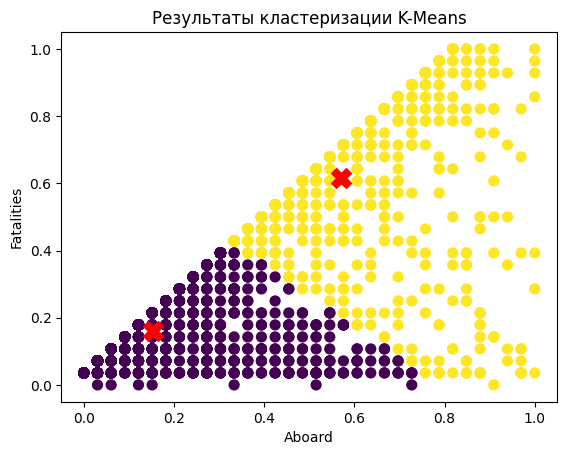

In [29]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2,n_init = 10,random_state = 42)

# Производим кластеризацию данных
kmeans.fit(df_cluster)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.scatter(df_cluster["Aboard"], df_cluster["Fatalities"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

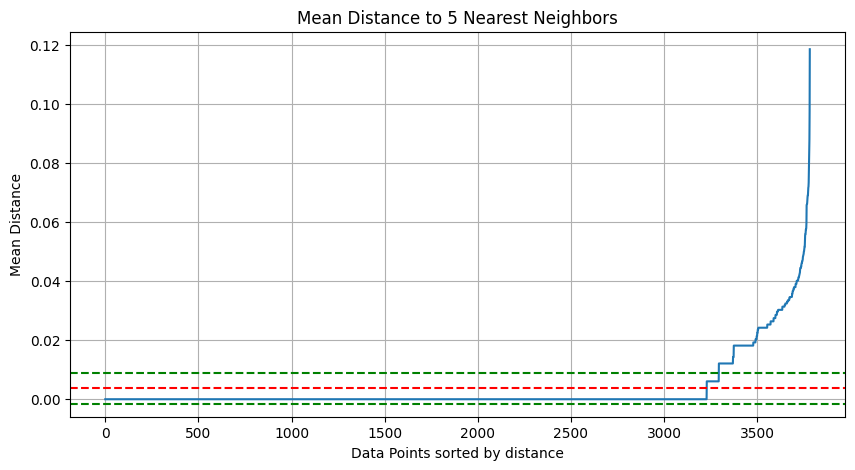

Оптимальный EPS = 0.003642265437514696


In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(min_max_scal):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1- v2) for j, v2 in enumerate(min_max_scal) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

 DBSCAN является мощным и гибким алгоритмом кластеризации, который может быть успешно применен к широкому спектру данных. Он особенно полезен, когда неизвестно заранее количество кластеров и когда данные содержат кластеры произвольной формы.

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

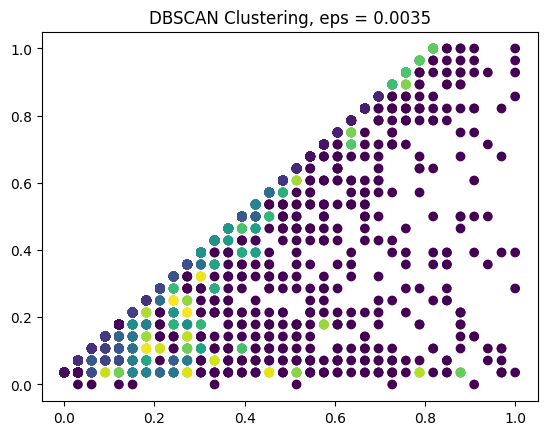

In [34]:
dbscan = DBSCAN(eps=0.0035, min_samples=5)
dbscan.fit(min_max_scal)
labels = dbscan.labels_
plt.scatter(df_cluster['Aboard'], df_cluster['Fatalities'], c=labels, cmap='viridis')
plt.title(f'DBSCAN Clustering, eps = 0.0035')
plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

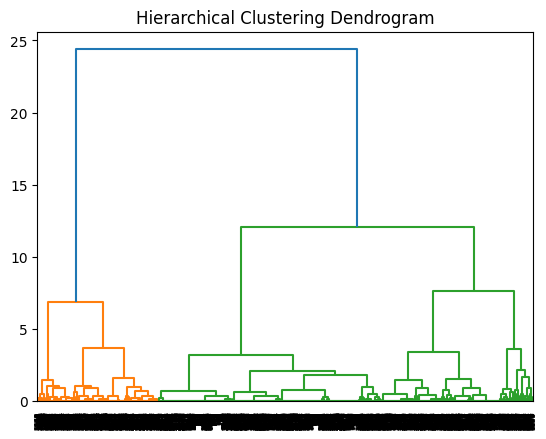

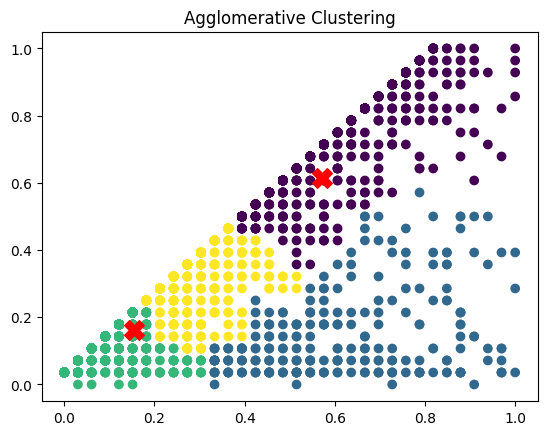

In [35]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(df_cluster)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(df_cluster, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(df_cluster['Aboard'], df_cluster['Fatalities'], c=agg_clustering.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('Agglomerative Clustering')
plt.show()


In [136]:
!pip install ydata-profiling

  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [38]:
!pip install lida

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 918.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.3/220.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.3 MB/s eta 0:00:00


In [41]:
!pip install llmx
!pip install tensorflow-probability

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.5.1 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.14.3 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
typeguard 4.1.5 requires typing-extensions>=4.7.0; python_version < "3.12", but you have typing-extensions 4.5.0 which is incompatible.


**Не получится сделать профилирование данных, так как по итогу осталось всего два метода**

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [100]:
kmeans.fit(df_cluster)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

In [103]:
dbscan = DBSCAN(eps=0.0035, min_samples=5)
dbscan.fit(df_cluster)
labels = dbscan.labels_

In [104]:
df_cluster['kmeans_cluster'] = cluster_labels
df_cluster['dbsscan_cluster'] = labels
df_cluster

,Aboard,Fatalities,kmeans_cluster,dbsscan_cluster
0,2.0,1.0,0,0
1,5.0,5.0,0,1
2,1.0,1.0,0,2
3,20.0,14.0,1,-1
6,19.0,19.0,1,3
...,...,...,...,...
5260,11.0,1.0,0,-1
5261,7.0,7.0,0,12
5262,18.0,18.0,1,9
5266,1.0,1.0,0,2


In [116]:
!pip install Pandas_Profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.0 MB/s eta 0:00:00


In [118]:

uniq_labels = tuple(set(labels))

print(uniq_labels)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, -1)


In [158]:
!pip install typing-extensions --upgrade

In [157]:
import typing_extensions


In [142]:
!pip install lux


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.7 MB/s eta 0:00:00
  Created wheel for lux: filename=lux-0.5.1-py3-none-any.whl size=11964 sha256=4a8d731b397bef4eb33cef2f60ddae5aaa3c357c2ae6d2c8bb7b3a693c54b855
  Stored in directory: /root/.cache/pip/wheels/e8/23/56/ad9393d57959f25ca5a7d6e55cb280cd1f9affbc987e2fbd26
  Created wheel for lux-api: filename=lux_api-0.5.1-py3-none-any.whl size=185603 sha256=3fd92d56f6ea5dff2b5c718b5d8d7eaaed6e774c76ca9b1a5caf2ef9cafbf25d
  Stored in directory: /root/.cache/pip/wheels/29/2f/f5/d5f

In [149]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 21.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357555 sha256=48624825e19e707bd8fbd057064556dfdb4b3824b4eda98a9c1b293c47d7cd79
  Stored in directory: /tmp/pip-ephem-wheel-cache-5zd2xaqo/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
Successfully built ydata-profiling
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.6.1
    Uninstalling ydata-profiling-4.6.1:
      Successfully uninstalled ydata-profiling-4.6.1


In [156]:
from typing_extensions import Buffer

ImportError: ignored

In [152]:
from pandas_profiling import ProfileReport

ImportError: ignored

In [148]:
df_cluster.intent = ["Aboard", "Fatalities"]
df_cluster

,Aboard,Fatalities,kmeans_cluster,dbsscan_cluster
0,2.0,1.0,0,0
1,5.0,5.0,0,1
2,1.0,1.0,0,2
3,20.0,14.0,1,-1
6,19.0,19.0,1,3
...,...,...,...,...
5260,11.0,1.0,0,-1
5261,7.0,7.0,0,12
5262,18.0,18.0,1,9
5266,1.0,1.0,0,2
